# Example Sensitivity Analysis with YODO

This notebook shows how to compute and visualize sensitivity metrics from a Bayesian network using YODO. Here we will use the [hailfinder network](https://www.bnlearn.com/documentation/man/hailfinder.html), which models the hail probability in notheastern Colorado.

Let us first load the network using [pgmpy](https://pgmpy.org/):

In [1]:
import pgmpy.readwrite
import yodo
import matplotlib.pyplot as plt

g = pgmpy.readwrite.BIFReader("networks/hailfinder.bif").get_model()
print('Number of nodes:', len(g.nodes))
print('Number of arcs:', len(g.edges))

Number of nodes: 56
Number of arcs: 66


Let us show a barplot to see the 20 most important parameters for the probability of interest `P(AMCINInScen = Average | VISCloudCov = Clear)`:

/home/rballester/Dropbox/repos/gmtorch/gmtorch/io.py:60: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at ../c10/core/TensorImpl.h:1788.)
  newfactor = torch.tensor(factor.values, names=factor.variables)


<Figure size 640x480 with 0 Axes>

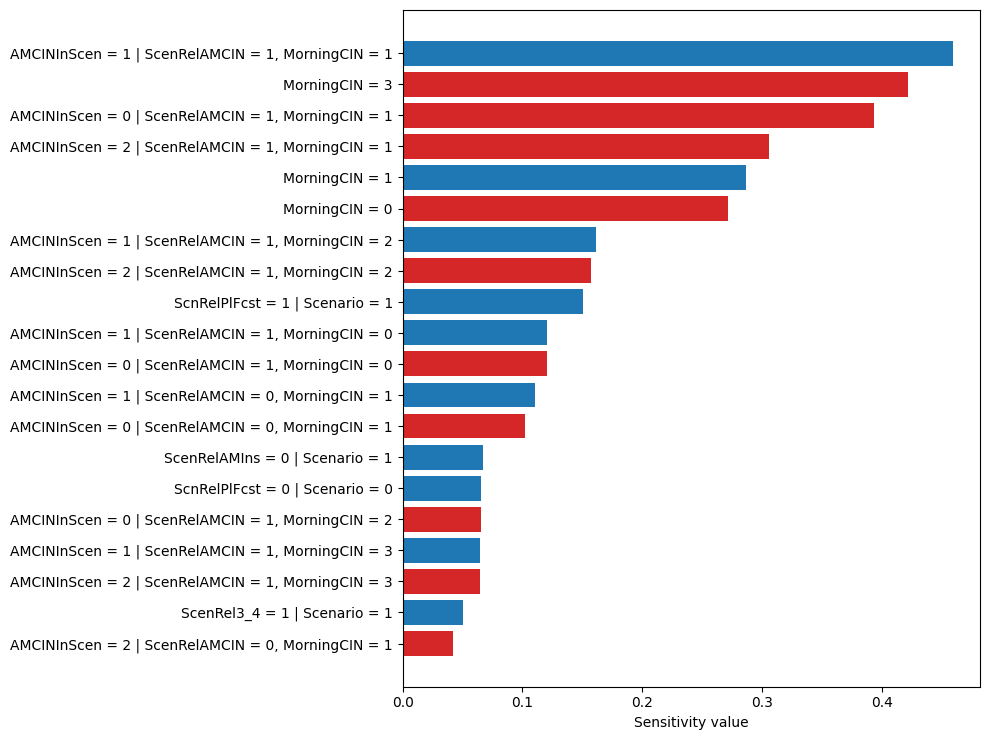

In [2]:
plt.figure()
yodo.plot(g, probability={'AMCINInScen': 'Average'}, given={'VISCloudCov': 'Clear'}, nbars=20)

If, instead, you want to work with sensitivity metrics numerically, you can do this:

In [3]:
analysis = yodo.yodo(g, probability={'AMCINInScen': 'Average'}, given={'VISCloudCov': 'Clear'})

Let's look at the sensitivity values for the parameters in, say, the conditional probability table of `Scenario | Date`:

In [4]:
sv = analysis[('Date', 'Scenario')]['sensitivity_value']
sv

tensor([[0.0320, 0.0167, 0.0141, 0.0282, 0.0100, 0.0299],
        [0.0342, 0.0189, 0.0156, 0.0311, 0.0108, 0.0320],
        [0.0112, 0.0046, 0.0031, 0.0061, 0.0019, 0.0060],
        [0.0110, 0.0046, 0.0030, 0.0060, 0.0018, 0.0059],
        [0.0110, 0.0048, 0.0033, 0.0069, 0.0020, 0.0061],
        [0.0102, 0.0043, 0.0029, 0.0060, 0.0018, 0.0055],
        [0.0110, 0.0048, 0.0032, 0.0059, 0.0019, 0.0061],
        [0.0112, 0.0045, 0.0029, 0.0058, 0.0018, 0.0058],
        [0.0111, 0.0045, 0.0029, 0.0060, 0.0018, 0.0059],
        [0.0104, 0.0047, 0.0033, 0.0064, 0.0020, 0.0061],
        [0.0122, 0.0047, 0.0030, 0.0060, 0.0019, 0.0065]], dtype=torch.float64,
       names=('Scenario', 'Date'))

Last, let's visualize it using *matplotlib*:

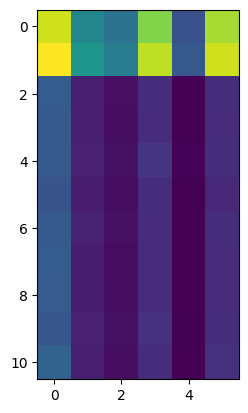

In [5]:
plt.figure()
plt.imshow(sv.numpy())